In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
df =pd.read_csv("stock_prices.csv")
df.head(10)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026
5,20170104_1379,2017-01-04,1379,2105.0,2147.0,2101.0,2143.0,77300,1.0,NaN,False,0.005169
6,20170104_1381,2017-01-04,1381,1950.0,1960.0,1949.0,1960.0,1300,1.0,NaN,False,-0.009326
7,20170104_1407,2017-01-04,1407,857.0,877.0,851.0,866.0,147000,1.0,NaN,False,-0.003437
8,20170104_1414,2017-01-04,1414,4940.0,5060.0,4935.0,5050.0,119600,1.0,NaN,False,0.000000
9,20170104_1417,2017-01-04,1417,1051.0,1063.0,1048.0,1053.0,347500,1.0,NaN,False,-0.007463


In [3]:
df = df.drop(['RowId','AdjustmentFactor','ExpectedDividend','SupervisionFlag','Target'], axis=1)

In [6]:
df = df.dropna()

In [7]:
x, y = np.array(df[["Open","High","Low","Volume"]]).reshape((-1, 4)), np.array(df["Close"]).reshape((-1, 1))

In [8]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [9]:
import statsmodels.api as sm
x = sm.add_constant(x)

In [10]:
model2= sm.OLS(y, x).fit()

In [13]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.040e+09
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:46:34   Log-Likelihood:            -1.1570e+07
No. Observations:             2324923   AIC:                         2.314e+07
Df Residuals:                 2324918   BIC:                         2.314e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2738      0.029      9.502      0.0

<AxesSubplot:xlabel='Open', ylabel='Close'>

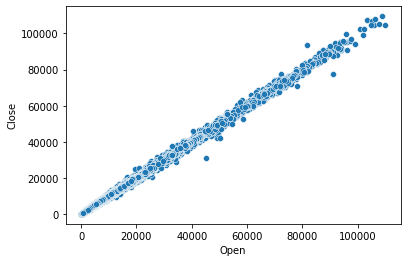

In [18]:
sns.scatterplot(x="Open", y="Close", data=df)

<AxesSubplot:xlabel='High', ylabel='Close'>

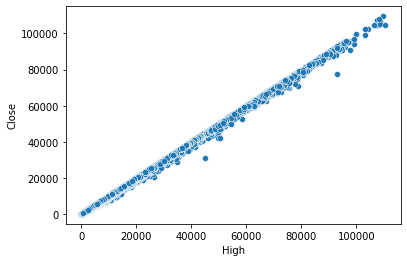

In [19]:
sns.scatterplot(x="High", y="Close", data=df)

<AxesSubplot:xlabel='Low', ylabel='Close'>

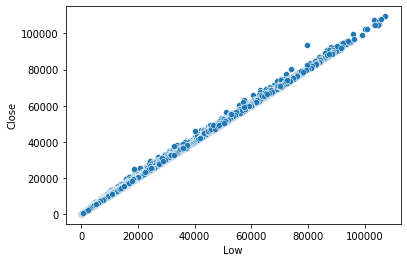

In [20]:
sns.scatterplot(x="Low", y="Close", data=df)

<AxesSubplot:xlabel='Volume', ylabel='Close'>

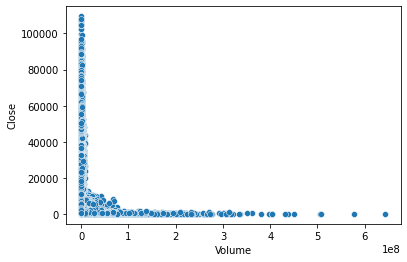

In [21]:
sns.scatterplot(x="Volume", y="Close", data=df)